In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras # for machine learning models
import scipy # linear models..etc

#Taking both time inputs as strings and returning float
import datetime
#We import the required libraries for data exploration and visualization.
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

print(os.listdir("."))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['ClickSoftware_Entrance_notebook.ipynb', 'DataScienceExamDataset - גיליון1.csv', '.ipynb_checkpoints']


In [4]:
# The data for completed task is marked by 0 in the result column 1 for incompleted ones.
DATA_PATH = 'DataScienceExamDataset - גיליון1.csv'
data_df = pd.read_csv(DATA_PATH)
data_df.head()

,OpenDate,FirstName,LastName,Gender,PreviousCancellations,YearsAsCustomer,CustomerApproved,AppointmentDate,AppointmentSlot,EngineerKey,TaskCategory,Maintenance,FixDescription,CustomerAge,PastVisits,Result
0,9/14/16,Aurelia,Hursey,Female,0,3-5 Years,False,9/25/16,NaN,1234490,Planned Maintenance,Premise maintenance with customer,NaN,70 to 80,1,0
1,9/17/16,Sid,Fye,NaN,0,0-1 Years,False,9/28/16,12:00 PM - 02:00 PM,1234493,Business SLA,Premise maintenance with customer,NaN,70 to 80,0,1
2,9/13/16,Kathrin,Lizotte,Female,0,Over 5 Years,False,9/29/16,04:00 PM - 06:00 PM,1234494,New Install,Premise maintenance with customer,NaN,40 to 50,0,0
3,9/17/16,Jacinta,Ealey,Female,0,0-1 Years,False,9/27/16,10:00 AM - 12:00 PM,1234491,Planned Maintenance,Premise maintenance with customer,NaN,30 to 40,0,0
4,9/12/16,Sal,Lupi,Male,0,1-3 Years,False,10/5/16,02:00 PM - 04:00 PM,1234495,New Install,Premise maintenance with customer,NaN,50 to 60,0,0


Text(0,0.5,'Count')

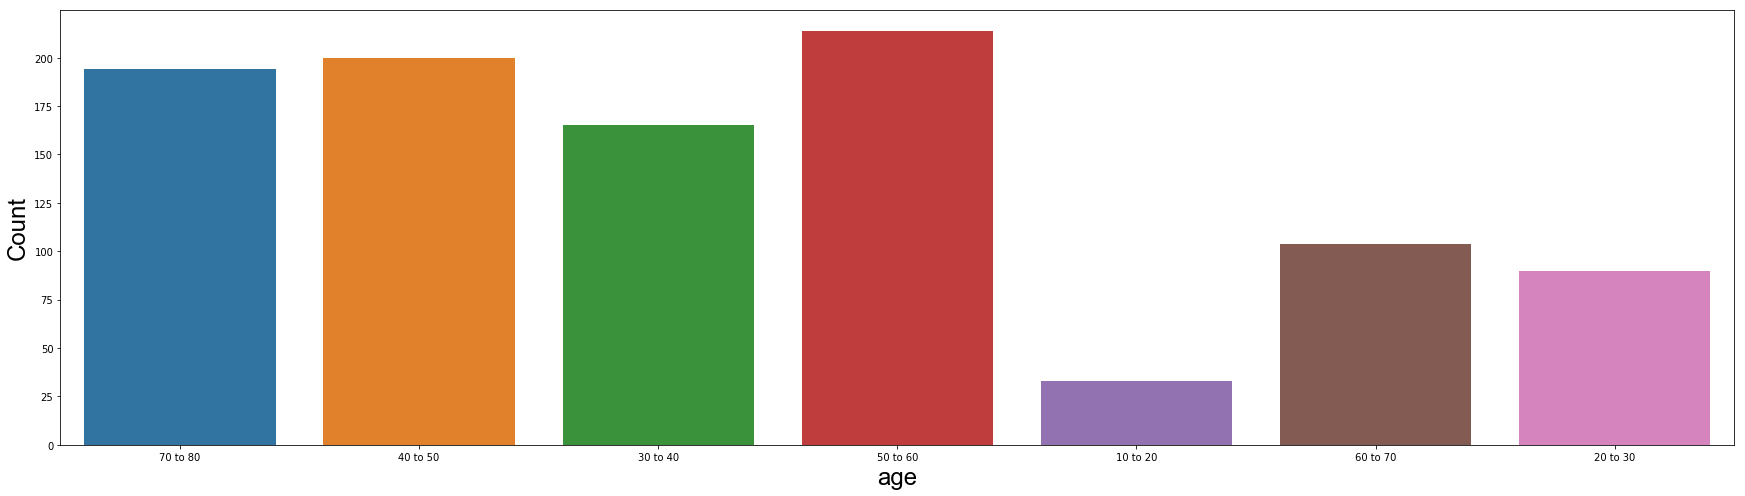

In [13]:
# distribution of the target age

ax = plt.figure(figsize=(30, 8))
sns.countplot(data_df.CustomerAge)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.xlabel('age',  **axis_font)
plt.ylabel('Count',  **axis_font)

Text(0,0.5,'Count')

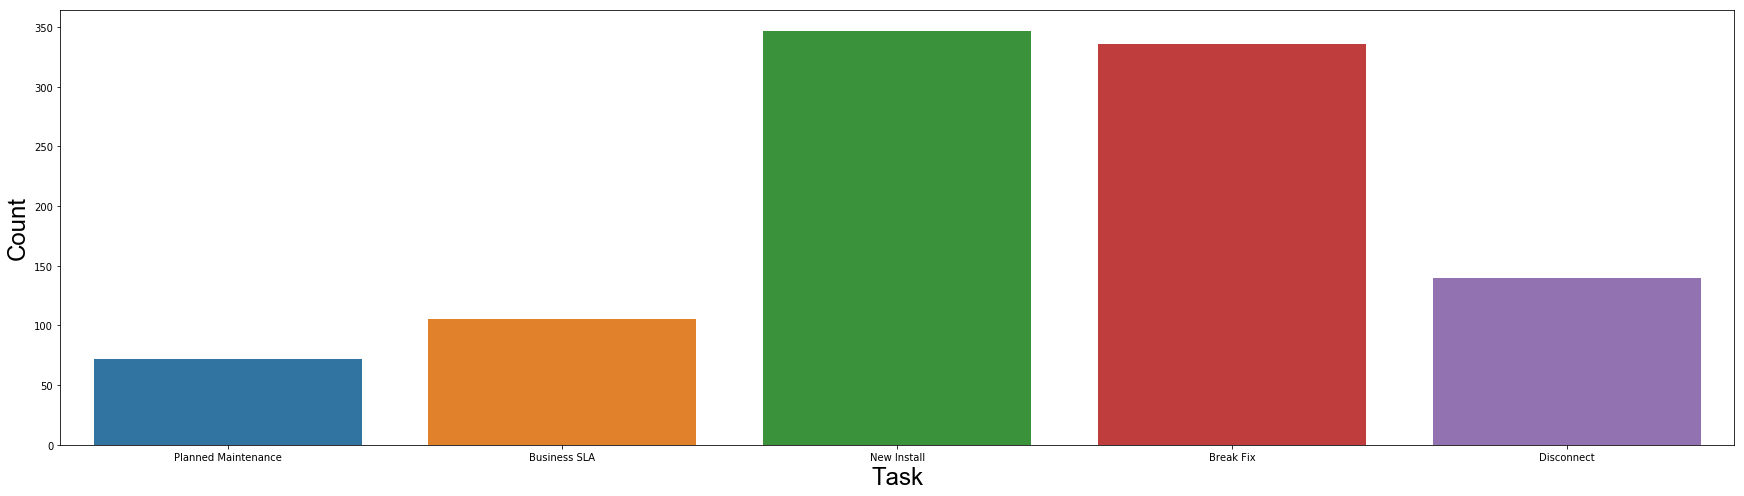

In [34]:
# distribution of the task type

ax = plt.figure(figsize=(30, 8))
sns.countplot(data_df.TaskCategory)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.xlabel('Task',  **axis_font)
plt.ylabel('Count',  **axis_font)

Text(0,0.5,'Count')

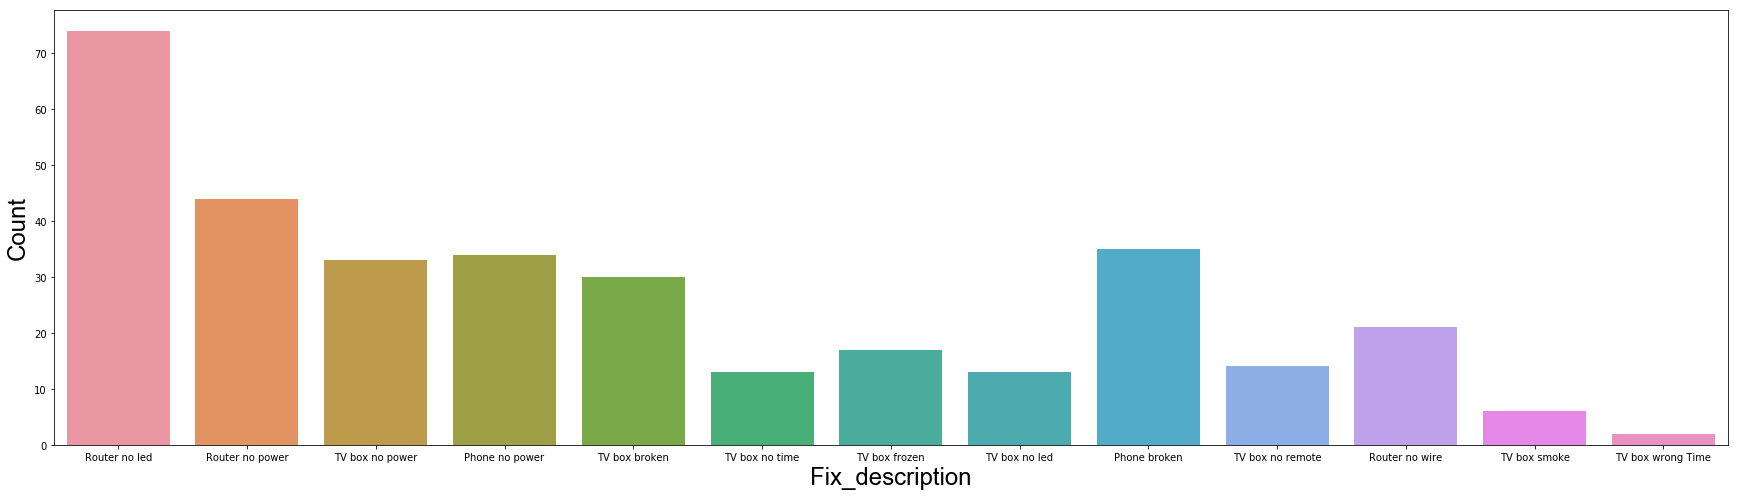

In [36]:
# distribution of the Fix type

ax = plt.figure(figsize=(30, 8))
sns.countplot(data_df.FixDescription)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.xlabel('Fix_description',  **axis_font)
plt.ylabel('Count',  **axis_font)

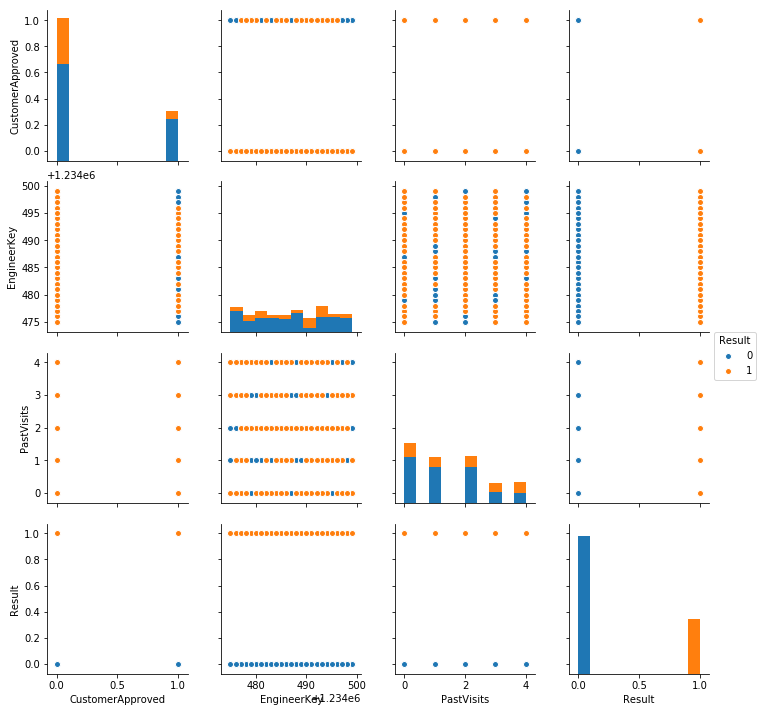

In [14]:
sns.pairplot(data_df, hue="Result")

In [15]:
data_df.YearsAsCustomer.unique()

array(['3-5 Years', '0-1 Years', 'Over 5 Years', '1-3 Years'],
      dtype=object)

In [17]:
Successful_visits = data_df.loc[data_df['Result'] == 0]
Problematic_visits = data_df.loc[data_df['Result'] == 1]

In [30]:
len(Successful_visits['Gender'])

717

In [31]:
len(Problematic_visits['Gender'])

283

In [19]:
Problematic_visits.head()

,OpenDate,FirstName,LastName,Gender,PreviousCancellations,YearsAsCustomer,CustomerApproved,AppointmentDate,AppointmentSlot,EngineerKey,TaskCategory,Maintenance,FixDescription,CustomerAge,PastVisits,Result
1,9/17/16,Sid,Fye,NaN,0,0-1 Years,False,9/28/16,12:00 PM - 02:00 PM,1234493,Business SLA,Premise maintenance with customer,NaN,70 to 80,0,1
5,9/15/16,Ying,Ariola,NaN,0,0-1 Years,False,10/2/16,02:00 PM - 04:00 PM,1234496,Break Fix,Premise maintenance with customer,Router no led,70 to 80,4,1
7,9/16/16,Charmain,Findlay,Female,0,0-1 Years,False,10/2/16,08:00 AM - 10:00 AM,1234491,Break Fix,Premise maintenance with customer,Router no power,50 to 60,2,1
9,9/14/16,Carlita,Epling,Female,0,1-3 Years,False,10/2/16,02:00 PM - 04:00 PM,1234476,Break Fix,NaN,TV box no power,10 to 20,1,1
11,9/13/16,Mark,Pruden,Male,2,1-3 Years,True,9/28/16,08:00 AM - 10:00 AM,1234491,Disconnect,Premise maintenance with customer,NaN,50 to 60,2,1


In [44]:
#Checking off-hand some of the indicators
pr_dict_given_past = dict()
temp_visits_stats_successful = Successful_visits.PastVisits.value_counts()
temp_visits_stat_failed = Problematic_visits.PastVisits.value_counts()
for times in data_df.PastVisits.unique():
    pr_dict_given_past[str(times)] = temp_visits_stat_failed[times]/(temp_visits_stats_successful[times]+temp_visits_stat_failed[times])

#### Given the data we can give static indicators for successful and failed installation, this can be used as heuristics
the real work is encoding all this data and putting the reletive weights to the features by relevance

In [41]:
pr_dict_given_past

{'1': 0.2301255230125523,
 '0': 0.22580645161290322,
 '4': 0.5233644859813084,
 '2': 0.23553719008264462,
 '3': 0.4411764705882353}

In [28]:
sum(temp_visits_stat_failed.values)

283

In [29]:
sum(temp_visits_stats_successful)

717

In [35]:
data_df.CustomerApproved.value_counts()

False    743
True     257
Name: CustomerApproved, dtype: int64

### Encoding the data in such a way that we can run an SVM on it

In [58]:
# So from here on we take the features that seem relevant encode them, to appropriate values.
# Then fit a SVM model based on this data, later on we can fit the different weights for this experiement.
# Note that would we have more time, I would fit more information into this model by analysing things like time slots..etc

In [45]:
new_data = data_df

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
import category_encoders as ce

In [47]:
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)

In [64]:
obj_df = data_df.select_dtypes(include=['object']).copy()
obj_df.head()

,OpenDate,FirstName,LastName,Gender,PreviousCancellations,YearsAsCustomer,AppointmentDate,AppointmentSlot,TaskCategory,Maintenance,FixDescription,CustomerAge
0,9/14/16,Aurelia,Hursey,Female,0,3-5 Years,9/25/16,NaN,Planned Maintenance,Premise maintenance with customer,NaN,70 to 80
1,9/17/16,Sid,Fye,NaN,0,0-1 Years,9/28/16,12:00 PM - 02:00 PM,Business SLA,Premise maintenance with customer,NaN,70 to 80
2,9/13/16,Kathrin,Lizotte,Female,0,Over 5 Years,9/29/16,04:00 PM - 06:00 PM,New Install,Premise maintenance with customer,NaN,40 to 50
3,9/17/16,Jacinta,Ealey,Female,0,0-1 Years,9/27/16,10:00 AM - 12:00 PM,Planned Maintenance,Premise maintenance with customer,NaN,30 to 40
4,9/12/16,Sal,Lupi,Male,0,1-3 Years,10/5/16,02:00 PM - 04:00 PM,New Install,Premise maintenance with customer,NaN,50 to 60


In [68]:
#Some important cleaning neads to be done here
len(obj_df[obj_df.isnull().any(axis=1)])
# Possible to go to each column and fill by the most frequent value

782

In [82]:
h = data_df["Gender"].value_counts()
1000- sum(h.values)

147

In [84]:
MAGIC_DATA_SIZE = 1000
cl_list = list(data_df.columns.values)
for cl in cl_list:
    print("{0} has the following {1} of Null values and {2} valid values".format(cl, MAGIC_DATA_SIZE- sum(data_df[cl].value_counts().values),sum(data_df[cl].value_counts().values)))

OpenDate has the following 0 of Null values and 1000 valid values
FirstName has the following 0 of Null values and 1000 valid values
LastName has the following 0 of Null values and 1000 valid values
Gender has the following 147 of Null values and 853 valid values
PreviousCancellations has the following 0 of Null values and 1000 valid values
YearsAsCustomer has the following 0 of Null values and 1000 valid values
CustomerApproved has the following 0 of Null values and 1000 valid values
AppointmentDate has the following 0 of Null values and 1000 valid values
AppointmentSlot has the following 181 of Null values and 819 valid values
EngineerKey has the following 0 of Null values and 1000 valid values
TaskCategory has the following 0 of Null values and 1000 valid values
Maintenance has the following 8 of Null values and 992 valid values
FixDescription has the following 664 of Null values and 336 valid values
CustomerAge has the following 0 of Null values and 1000 valid values
PastVisits has

In [87]:
new_data = new_data.loc[: ,["PreviousCancellations","YearsAsCustomer", "TaskCategory", "CustomerAge", "PastVisits", "Result"]]

In [90]:
train_data= new_data[:-100]
test_data = new_data[-100:]

In [124]:
X = train_data.iloc[:,:-1]
y = train_data.loc[:,["Result"]]

In [138]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
Result    900 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [140]:
test_y = test_data.loc[:,["Result"]]
test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 900 to 999
Data columns (total 1 columns):
Result    100 non-null int64
dtypes: int64(1)
memory usage: 884.0 bytes


In [141]:
Test_res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 900 to 999
Data columns (total 18 columns):
intercept                  0 non-null float64
PreviousCancellations_0    100 non-null float64
PreviousCancellations_1    100 non-null float64
PreviousCancellations_2    100 non-null float64
YearsAsCustomer_0          100 non-null float64
YearsAsCustomer_1          100 non-null float64
YearsAsCustomer_2          100 non-null float64
TaskCategory_0             100 non-null float64
TaskCategory_1             100 non-null float64
TaskCategory_2             100 non-null float64
TaskCategory_3             100 non-null float64
CustomerAge_0              100 non-null float64
CustomerAge_1              100 non-null float64
CustomerAge_2              100 non-null float64
CustomerAge_3              100 non-null float64
CustomerAge_4              100 non-null float64
CustomerAge_5              100 non-null float64
PastVisits                 0 non-null float64
dtypes: float64(18)
memory usage:

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
PreviousCancellations    900 non-null object
YearsAsCustomer          900 non-null object
TaskCategory             900 non-null object
CustomerAge              900 non-null object
PastVisits               900 non-null int64
dtypes: int64(1), object(4)
memory usage: 35.2+ KB


#### Encoding the data in order to run a proper SVM

In [111]:
obj_df = X.select_dtypes(include=['object']).copy()
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["YearsAsCustomer", "TaskCategory", "PreviousCancellations","CustomerAge"])
encoder.fit(obj_df, verbose=1)

X_res_df = encoder.transform(obj_df)

In [133]:
obj_df = test_data.select_dtypes(include=['object']).copy()
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["YearsAsCustomer", "TaskCategory", "PreviousCancellations","CustomerAge"])
encoder.fit(obj_df, verbose=1)

Test_res_df = encoder.transform(obj_df)

In [114]:
X_res_df["PastVisits"] = X["PastVisits"]

In [137]:
Test_res_df["PastVisits"] = train_data["PastVisits"]

In [166]:
X_res_df.intercept.value_counts()

1    900
Name: intercept, dtype: int64

## Running the actual prediction model on the cleaned data

In [159]:
import sklearn as sk  
from sklearn import svm

SVM = svm.LinearSVC()  
SVM.fit(X_res_df, y)  
SVM.predict(X_res_df.iloc[800:,:])  
np.round(SVM.score(X_res_df,y["Result"]), 4)  

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7722

In [164]:
Test_res_df["PastVisits"] = test_data["PastVisits"]

In [167]:
Test_res_df["intercept"] = 1

In [169]:
SVM.predict(Test_res_df)  
np.round(SVM.score(Test_res_df, test_y["Result"]), 4)

0.67

## Potential Future work 

#### Steps
1) Working with different encoding models, such as One-Hot orother embeddings that would structure our data better.
2) Providing weights for the different features so they would carry more weight in the training phase of the SVM.
3) Perhaps even building the actual kernel for this task.
4) We can always train the model on larger data sets.

5) Different approach : doing random forest after determinig some siginificant features